## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [22]:
#import tensorflow as tf
import numpy as np


(60000,)

### Find no.of samples are there in training and test datasets

In [23]:
# This shows there are 60,000 samples in the training data set.
x_train.shape

(60000, 28, 28)

In [24]:
# This shows there are 10,000 samples in the training data set.

x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [25]:
firstObj = x_test[0]

print(firstObj.shape)

# Dimension of an image is 28 vs 28.

(28, 28)


In [0]:
#Convert labels to one hot encoding
import keras

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test =keras.utils.to_categorical(y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
# Changing the datatype of x_train and x_test first to float 32.

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
# Normalize

x_train = x_train/255
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
# This will be done while building the model 

### Import the necessary layers from keras to build the model

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

In [0]:
# Build the Model 

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:

#Clear out tensorflow memory
keras.backend.clear_session()

# Define the Type of Model
model1 = Sequential()

In [34]:
# 1st Conv Layer
    model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model1.add(Activation('relu'))

    # 2nd Conv Layer
    model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model1.add(Activation('relu'))

    # Fully Connected Layer
    model1.add(Flatten())
    model1.add(Dense(128))
    model1.add(Activation('relu'))

    # Prediction Layer
    model1.add(Dense(10))
    model1.add(Activation('softmax'))

    # Loss and Optimizer
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

     # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """


In [35]:
# Train the model
model1.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  




Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 28s 462us/step - loss: 0.3698 - acc: 0.8662 - val_loss: 0.2785 - val_acc: 0.8977
Epoch 2/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.2289 - acc: 0.9155 - val_loss: 0.2661 - val_acc: 0.9062
Epoch 3/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.1645 - acc: 0.9400 - val_loss: 0.2465 - val_acc: 0.9146
Epoch 4/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.1156 - acc: 0.9566 - val_loss: 0.2703 - val_acc: 0.9101
Epoch 5/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.0754 - acc: 0.9723 - val_loss: 0.3017 - val_acc: 0.9186
Epoch 6/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.0513 - acc: 0.9813 - val_loss: 0.3641 - val_acc: 0.9107
Epoch 7/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.0339 - acc: 0.9873 - val_l

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
# Define the Type of Model
model2 = Sequential()

In [37]:

# Define the Type of Model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu')) 

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu')) 

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model2.add(Dropout(0.25))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model2.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), callbacks=callback_list)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.3926 - acc: 0.8590 - val_loss: 0.3101 - val_acc: 0.8868
Epoch 2/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.2587 - acc: 0.9049 - val_loss: 0.2560 - val_acc: 0.9041
Epoch 3/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.2120 - acc: 0.9207 - val_loss: 0.2574 - val_acc: 0.9069
Epoch 4/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.1786 - acc: 0.9335 - val_loss: 0.2386 - val_acc: 0.9175
Epoch 5/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.1534 - acc: 0.9427 - val_loss: 0.2275 - val_acc: 0.9194
Epoch 6/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.1312 - acc: 0.9496 - val_loss: 0.2258 - val_acc: 0.9225
Epoch 7/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.1119 - acc: 0.9580 - val_loss: 0.

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

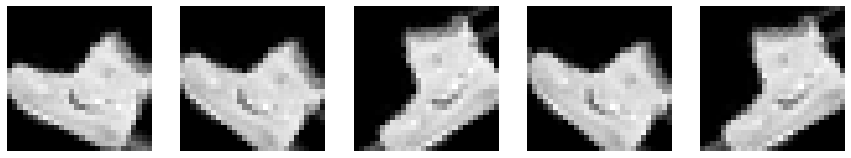

In [40]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
# Complile the model
model3 = Sequential()

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model3.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    epochs=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=10, validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1562)`
  after removing the cwd from sys.path.


RuntimeError: ignored

###  Report the final train and validation accuracy

In [0]:
loss_and_metrics = model3.evaluate(x_train, y_train)
print(loss_and_metrics)

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### **Load CIFAR10 dataset**

In [51]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen1 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images



### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen1.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


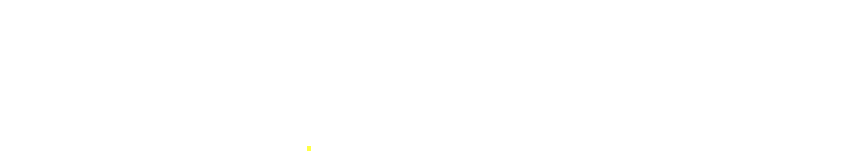

In [55]:
gen = datagen1.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()